**This program requires a 3rd party package called `spotipy` which is a python library used to review spotify API**

Step 1: please install **spotipy** through command line

```python
pip install spotipy
```

Step 2: import the required libraries and dependents

In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/API')

import apikeys 

import requests

import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import figure

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step3: create the spotipy object `sp`

In [ ]:
cid = apikeys.ClientID
secret = apikeys.ClientSecret

In [ ]:
client_credentials_manager = \
       SpotifyClientCredentials(client_id = cid,
                               client_secret = secret)

In [ ]:
sp = spotipy.Spotify(client_credentials_manager =\
                    client_credentials_manager)

In [ ]:
sp

---
---

  > spotify search query rules
  * https://developer.spotify.com/documentation/web-api/reference/#/operations/search

`hint:` the max of `limit` will be 50, rules of spotify, but luckily you can change `offset` to iterative and ask another 50

In [ ]:
track_name = []
popularity = []
release_date = []

for i in range(10):
        countrymusic = sp.search(q="year:2012-2022 genre:country",type="track",limit = 50, offset = i*50)
        countrymusic


        for j in range(len(countrymusic['tracks']['items'])):
          track_name.append(countrymusic["tracks"]["items"][j]["name"])
          popularity.append(countrymusic["tracks"]["items"][j]["popularity"])
          release_date.append(countrymusic['tracks']['items'][j]['album']['release_date'])

df1 = pd.DataFrame({
                          "TrackName":track_name, 
                          "Popularity":popularity,
                          "ReleaseDate":release_date})
df1['genre'] = 'Country'



In [ ]:
df1

,TrackName,Popularity,ReleaseDate,genre
0,Something in the Orange,88,2022-04-22,Country
1,You Proof,85,2022-05-13,Country
2,Wasted On You,82,2021-01-08,Country
3,Rock and A Hard Place,83,2022-06-10,Country
4,She Had Me At Heads Carolina,81,2022-04-08,Country
...,...,...,...,...
495,Like I Loved You,63,2017-02-10,Country
496,Happy Instead,63,2022-05-20,Country
497,Knockin' Boots,64,2020-08-07,Country
498,Craving You,63,2017-09-08,Country


In [ ]:
len(countrymusic['tracks']['items'])

50

In [ ]:
track_name = []
popularity = []
release_date = []

for i in range(10):
          popmusic = sp.search(q="year:2012-2022 genre:pop",type="track",limit = 50, offset = i*50)
          popmusic

          for j in range(len(popmusic['tracks']['items'])):
            track_name.append(popmusic["tracks"]["items"][j]["name"])
            popularity.append(popmusic["tracks"]["items"][j]["popularity"])
            release_date.append(popmusic['tracks']['items'][j]['album']['release_date'])

df3 = pd.DataFrame({
                          "TrackName":track_name, 
                          "Popularity":popularity,
                          "ReleaseDate":release_date})
df3['genre'] = 'POP'


In [ ]:
popularity = []
track_name = []
release_date = []
for i in range(10):
            rapmusic = sp.search(q="year:2012-2022 genre:rap",type="track",limit = 50, offset = 1)
            rapmusic

            for j in range(len(rapmusic['tracks']['items'])):
                track_name.append(rapmusic["tracks"]["items"][j]["name"])
                popularity.append(rapmusic["tracks"]["items"][j]["popularity"])
                release_date.append(rapmusic['tracks']['items'][j]['album']['release_date'])

df2 = pd.DataFrame({                     
                          "TrackName":track_name, 
                          "Popularity":popularity,
                          "ReleaseDate":release_date})
df2['genre'] = 'Rap'

df2

,TrackName,Popularity,ReleaseDate,genre
0,I Like You (A Happier Song) (with Doja Cat),90,2022-06-03,Rap
1,Bound 2,87,2013-06-18,Rap
2,WAIT FOR U (feat. Drake & Tems),88,2022-04-29,Rap
3,Super Freaky Girl,90,2022-08-12,Rap
4,No Role Modelz,87,2014-12-09,Rap
...,...,...,...,...
495,N95,82,2022-05-13,Rap
496,ball w/o you,81,2018-12-21,Rap
497,Love Me,79,2013-01-01,Rap
498,Don't,82,2015-10-02,Rap


In [ ]:

popularity = []
track_name = []
release_date = []
for i in range(10):
              rockmusic = sp.search(q="year:2012-2022 genre:rock",type="track",limit = 50, offset = 0)
              rockmusic

              for j in range(len(rockmusic['tracks']['items'])):
                  track_name.append(rockmusic["tracks"]["items"][j]["name"])
                  popularity.append(rockmusic["tracks"]["items"][j]["popularity"])
                  release_date.append(rockmusic['tracks']['items'][j]['album']['release_date'])
df5 = pd.DataFrame({
                          "TrackName":track_name, 
                          "Popularity":popularity,
                          "ReleaseDate":release_date})
df5['genre'] = 'Rock'

df5

,TrackName,Popularity,ReleaseDate,genre
0,I Ain't Worried,95,2022-05-13,Rock
1,Sweater Weather,92,2013-04-19,Rock
2,I Wanna Be Yours,91,2013-09-09,Rock
3,"Sex, Drugs, Etc.",89,2016-11-04,Rock
4,She Had Me At Heads Carolina,81,2022-04-08,Rock
...,...,...,...,...
495,It's Called: Freefall,76,2018-04-06,Rock
496,Heathens,81,2016-06-16,Rock
497,The Adults Are Talking,78,2020-04-10,Rock
498,High Hopes,80,2018-06-22,Rock


In [ ]:
popularity = []
track_name = []
release_date = []
for i in range(10):
              rbmusic = sp.search(q="year:2012-2022 genre:r&b",type="track",limit = 50, offset = 0)
              rbmusic

              for j in range(len(rbmusic['tracks']['items'])):
                 track_name.append(rbmusic["tracks"]["items"][j]["name"])
                 popularity.append(rbmusic["tracks"]["items"][j]["popularity"])
                 release_date.append(rbmusic['tracks']['items'][j]['album']['release_date'])
df4 = pd.DataFrame({
                         
                          "TrackName":track_name, 
                          "Popularity":popularity,
                          "ReleaseDate":release_date})
df4['genre'] = 'R&B'

df4

,TrackName,Popularity,ReleaseDate,genre
0,Under The Influence,95,2019-10-04,R&B
1,CUFF IT,93,2022-07-29,R&B
2,Evergreen (You Didn’t Deserve Me At All),88,2022-04-08,R&B
3,Die For You,87,2016-11-25,R&B
4,I Was Never There,89,2018-03-30,R&B
...,...,...,...,...
495,No Guidance (feat. Drake),79,2019-06-28,R&B
496,BREAK MY SOUL,81,2022-07-29,R&B
497,Sativa,75,2017-09-22,R&B
498,ENERGY (feat. Beam),79,2022-07-29,R&B


In [ ]:
merge = pd.concat([df1,df2,df3,df4,df5], join = 'inner')
merge['Years'] = pd.DatetimeIndex(merge["ReleaseDate"]).year

merge


,TrackName,Popularity,ReleaseDate,genre,Years
0,Something in the Orange,88,2022-04-22,Country,2022
1,You Proof,85,2022-05-13,Country,2022
2,Wasted On You,82,2021-01-08,Country,2021
3,Rock and A Hard Place,83,2022-06-10,Country,2022
4,She Had Me At Heads Carolina,81,2022-04-08,Country,2022
...,...,...,...,...,...
495,It's Called: Freefall,76,2018-04-06,Rock,2018
496,Heathens,81,2016-06-16,Rock,2016
497,The Adults Are Talking,78,2020-04-10,Rock,2020
498,High Hopes,80,2018-06-22,Rock,2018


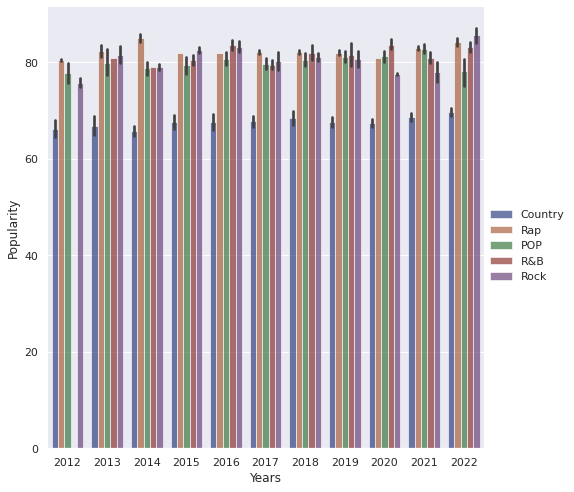

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize': (8,10)})

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=merge, kind="bar",
    x="Years", y="Popularity", hue="genre", 
    palette="dark", alpha=.6, height = 7)
g.despine(left=True)
#g.set_axis_labels("", "")
g.legend.set_title("")

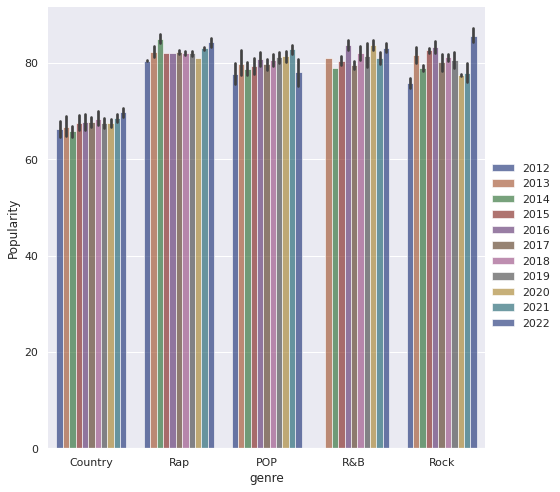

In [ ]:
sns.set(rc={'figure.figsize': (12, 8)})

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=merge, kind="bar",
    x="genre", y="Popularity", hue="Years", 
    palette="dark", alpha=.6, height = 7)
g.despine(left=True)
#g.set_axis_labels("", "")
g.legend.set_title("")

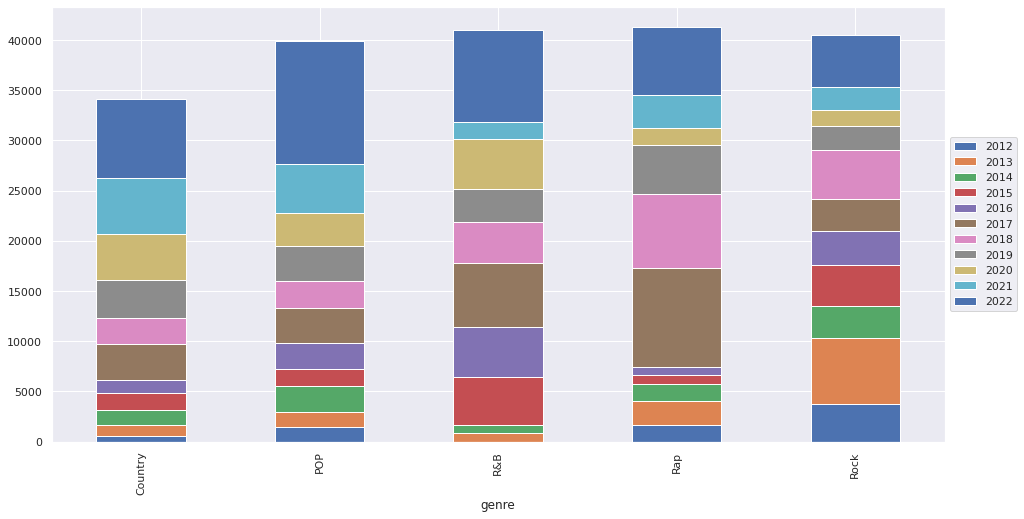

In [ ]:
import matplotlib.pyplot as plt
grouped = merge.groupby(['genre','Years'])['Popularity'].sum()
grouped.unstack('Years').plot(kind='bar', stacked=True,figsize = (16,8))
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

In [ ]:
import matplotlib.pyplot as plt
g=merge.groupby(['genre','Years'].size().unstack('Popularity').plot(kind='bar', stacked=True)
g.legend.set_title("")

# Question 2:  Is there any remarkable distinction between genres and popularity around the world?

In [ ]:
countries = ["Zimbabwe","Zambia","Yemen","Virgin Islands (U.S.)","Virgin Islands","Vietnam","Venezuela","Vanuatu","Uzbekistan","Uruguay","United States","United States Minor Outlying Islands[f]","United Kingdom","Ireland","United Arab Emirates","Ukraine","Uganda","Tuvalu","Turks and Caicos Islands","Turkmenistan","Turkey","Tunisia","Trinidad and Tobago","Tonga","Togo","Timor-Leste","Thailand","Taiwan","Syrian Arab Republic","Switzerland","Sweden","Svalbard","Suriname","Sudan","Sri Lanka","Spain","South Sudan","South Africa","Solomon Islands","Slovenia","Slovakia","Sint Maarten","Singapore","Seychelles","Serbia","Senegal","Saudi Arabia","Sao Tome","San Marino","Samoa","Saint Vincent","Grenadines","Saint Pierre","Saint Martin","Saint Lucia","Saint Kitts and Nevis","Saint Helena","Saint Barthélemy","Rwanda","Russian Federation","Romania","Réunion","Qatar","Puerto Rico","Portugal","Poland","Pitcairn","Philippines","Peru","Paraguay","Papua New Guinea","Panama","Pakistan","Oman","Norway","Northern Mariana Islands","North Macedonia","Norfolk Island","Niue","Nigeria","Niger","Nicaragua","New Zealand","New Caledonia","Netherlands","Nepal","Nauru","Namibia","Myanmar","Mozambique","Morocco","Montenegro","Mongolia","Monaco","Moldova","Micronesia","Mexico","Mayotte","Mauritius","Mauritania","Martinique","Marshall Islands","Malta","Mali","Maldives","Malaysia","Malawi","Madagascar","Macao","Luxembourg","Lithuania","Liechtenstein","Libya","Liberia","Lesotho","Lebanon","Latvia","Kyrgyzstan","Kuwait","Korea","Kiribati","Kenya","Kazakhstan","Jordan","Jersey","Japan","Jamaica","Italy","Israel","Isle of Man","Ireland","Iraq","Iran","Indonesia","India","Iceland","Hungary","Hong Kong","Honduras","Holy See","Heard Island","Haiti","Guyana","Guinea-Bissau","Guinea","Guernsey","Guatemala","Guam","Guadeloupe","Grenada","Greenland","Greece","Gibraltar","Ghana","Germany","Georgia","Gambia","Gabon","French Southern Territories","French Polynesia","French Guiana","France","Finland","Fiji","Faroe Islands","Falkland Islands","Ethiopia","Eswatini","Estonia","Eritrea","Equatorial Guinea","El Salvador","Egypt","Ecuador","Dominican Republic","Dominica","Djibouti","Denmark","Czechia","Cyprus","Curaçao","Cuba","Croatia","Côte d'Ivoire","Costa Rica","Cook Islands","Congo","Comoros","Colombia","China","Chile","Chad","Cayman Islands","Canada","Cameroon","Cambodia","Cabo Verde","Burundi","Burkina Faso","Bulgaria","Brunei Darussalam","Brazil","Bouvet Island","Botswana","Bosnia","Bolivia","Bhutan","Bermuda","Benin","Belize","Belgium","Belarus","Barbados","Bangladesh","Bahrain","Bahamas","Azerbaijan","Austria","Australia","Aruba","Armenia","Argentina","Antigua","Antarctica","Anguilla","Angola","Andorra","American Samoa","Algeria","Albania","Åland Islands","Afghanistan"]

fixed_country = []
song = []
artist_name = []
song_genre = []
lat = []
lon = []

api_lat = ""
url_lat = ""
base_url = ""
api_key = ""
for country in countries:
    try:
        url_lon = url_lat + country + "&limit=" + "1" + "&appid=" + api_lat + "&format=json"
    
        latg = requests.get(url_lon).json()
        lat_hold = latg[0]["lat"]
        lon_hold = latg[0]["lon"]
        
        url = base_url + "&country=" + country + "&api_key=" + api_key + "&format=json"
        fav_song = requests.get(url).json()
        
        song_hold = fav_song['tracks']['track'][0]['name']
        
        hold_name = fav_song['tracks']['track'][0]['artist']['name']
       
        
        print(country)
        
        
        name_base_url = "http://ws.audioscrobbler.com/2.0/?method=artist.gettoptags&"
        name_url = name_base_url + "artist=" + hold_name + "&api_key=" + api_key + "&format=json"
        fave_tag = requests.get(name_url).json()
        tags = fave_tag['toptags']['tag'][0]['name']

        print(tags)
        
        lat.append(lat_hold)
        lon.append(lon_hold)
        fixed_country.append(country)
        song.append(song_hold)
        artist_name.append(hold_name)
        song_genre.append(tags)
    except:
        print("No country found")
        pass
   


In [ ]:
data_df = pd.DataFrame({'countries': fixed_country, 'songs': song, 'Artist Name': artist_name, 'Song Genre': song_genre, 'latitude': lat, 'longitude': lon})

data_df

In [ ]:
patron_groups = data_df.groupby('Song Genre')

# Find out how many of each patron type borrowed library items
patron_borrows = patron_groups['Song Genre'].count()

# Chart our data, give it a title, and label the axes
patron_chart = patron_borrows.plot(kind="bar", title="Song favorite among countires", )
patron_chart.set_xlabel("Song Genres")
patron_chart.set_ylabel("Number of countries favorite song")

plt.savefig("..//Analysis Photos//Analysis #2//Bar_chart.png")

plt.show()

In [ ]:
gyms = data_df['Song Genre'].value_counts()


In [ ]:
plot_df = pd.DataFrame({'Genre': gerne, 'Value': gerne_val})
plot_df

In [ ]:
gyms = patron_groups['Song Genre'].unique()
members = patron_groups['Song Genre'].count()
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue","green","yellow"]
explode = (0, 0.05, 0.8, 0.9,0.8, 0.3, .7, .05,0.4, 0.5, 0.3, 0.8,0.3, 0.05, 0.8, 0.4,0.4, 0.05, 0.8, 0.5,0.3, 0.9, 0.3, 0.7,0.9)
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=200)
#plt.axis("equal")

plt.savefig("..//Analysis Photos//Analysis #2//Pie_chart.png")

plt.show()

In [ ]:
temperatures = patron_groups['Song Genre'].count()

mean_numpy = np.mean(temperatures)
print(f"The mean of all the summed genre favorites is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median of all the summed genre favorites is {median_numpy}")

max_scipy = np.max(temperatures)
print(f"The maximum of all the summed genre favorites is {max_scipy}")

min_scipy = np.min(temperatures)
print(f"The minimum of all the summed genre favorites is {min_scipy}")

In [ ]:
times = patron_groups['Song Genre'].count()
fig1, ax1 = plt.subplots()
ax1.set_title('Song Genres and their prevalance')
ax1.set_ylabel('Count')
ax1.boxplot(times)

plt.savefig("..//Analysis Photos//Analysis #2//Box_whisker.png")

plt.show()

In [ ]:
quartiles = times.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
n_lat = data_df.loc[data_df["latitude"] >= 0]
s_lat = data_df.loc[data_df["latitude"] < 0]

In [ ]:
n_lat

In [ ]:
s_lat

In [ ]:
patron_groups_north = n_lat.groupby('Song Genre')

patron_borrows_north = patron_groups_north['Song Genre'].count()

patron_chart_north = patron_borrows_north.plot(kind="bar", title="Song favorite among countires in Northern Hemisphere")
patron_chart_north.set_xlabel("Song Genres")
patron_chart_north.set_ylabel("Number of countries favorite song")

plt.savefig("..//Analysis Photos//Analysis #2//Bar_chart_north.png")

plt.show()

In [ ]:
patron_groups_n = n_lat.groupby('Song Genre')

temperatures_n = patron_groups_n['Song Genre'].count()

mean_numpy = np.mean(temperatures_n)
print(f"The mean of all the summed genre favorites is {mean_numpy}")

median_numpy = np.median(temperatures_n)
print(f"The median of all the summed genre favorites is {median_numpy}")

mode_scipy = np.max(temperatures_n)
print(f"The most of all the summed genre favorites is {mode_scipy}")

min_scipy = np.min(temperatures_n)
print(f"The minimum of all the summed genre favorites is {min_scipy}")

In [ ]:
..//Analysis Photos//Analysis #2//patron_groups_south = s_lat.groupby('Song Genre')

patron_borrows_south = patron_groups_south['Song Genre'].count()

patron_chart_south = patron_borrows_south.plot(kind="bar", title="Song favorite among countires in Southen Hemisphere")
patron_chart_south.set_xlabel("Song Genres")
patron_chart_south.set_ylabel("Number of countries favorite song")

plt.savefig("..//Analysis Photos//Analysis #2//Bar_chart_south.png")

plt.show()

In [ ]:
patron_groups_n = s_lat.groupby('Song Genre')

temperatures_n = patron_groups_n['Song Genre'].count()

mean_numpy = np.mean(temperatures_n)
print(f"The mean of all the summed genre favorites is {mean_numpy}")

median_numpy = np.median(temperatures_n)
print(f"The median of all the summed genre favorites is {median_numpy}")

mode_scipy = np.max(temperatures_n)
print(f"The most of all the summed genre favorites is {mode_scipy}")

min_scipy = np.min(temperatures_n)
print(f"The minimum of all the summed genre favorites is {min_scipy}")